In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# EDA

## Data Cleaning

In [20]:
healthData = pd.read_csv('CVD_cleaned.csv')

In [21]:
healthData.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [22]:
healthData.duplicated().sum()

80

In [23]:
healthData.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [24]:
healthData.rename(columns={'Age_Category': 'Age', 'Height_(cm)': 'Height', 'Weight_(kg)': 'Weight'}, inplace=True)

In [25]:
print(healthData.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age                              object
Height                          float64
Weight                          float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [26]:
variables_to_remove = ['Skin_Cancer', 'Other_Cancer']
healthData = healthData.drop(variables_to_remove, axis=1)

In [27]:
print(healthData.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Depression',
       'Diabetes', 'Arthritis', 'Sex', 'Age', 'Height', 'Weight', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [28]:
healthData.head()

,General_Health,Checkup,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Age,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


---

## Univariate Analysis

In [29]:
healthData.describe()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [14]:
categorical_features = ['General_Health','Exercise', 'Heart_Disease', 'Depression', 'Diabetes', 'Arthritis','Sex','Age_Category','Height_(cm)','Weight_(kg)','BMI','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

In [16]:
for feature in categorical_features:
    print(feature,':')
    print(healthData[feature].value_counts())
    print("-----------------")


General_Health :
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
-----------------
Exercise :
Yes    239381
No      69473
Name: Exercise, dtype: int64
-----------------
Heart_Disease :
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
-----------------
Depression :
No     246953
Yes     61901
Name: Depression, dtype: int64
-----------------
Diabetes :
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64
-----------------
Arthritis :
No     207783
Yes    101071
Name: Arthritis, dtype: int64
-----------------
Sex :
Female    160196
Male      148658
Name: Sex, dtype: int64
-----------------
Age_Category :
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    2159

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\2054700241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(healthData[feature])


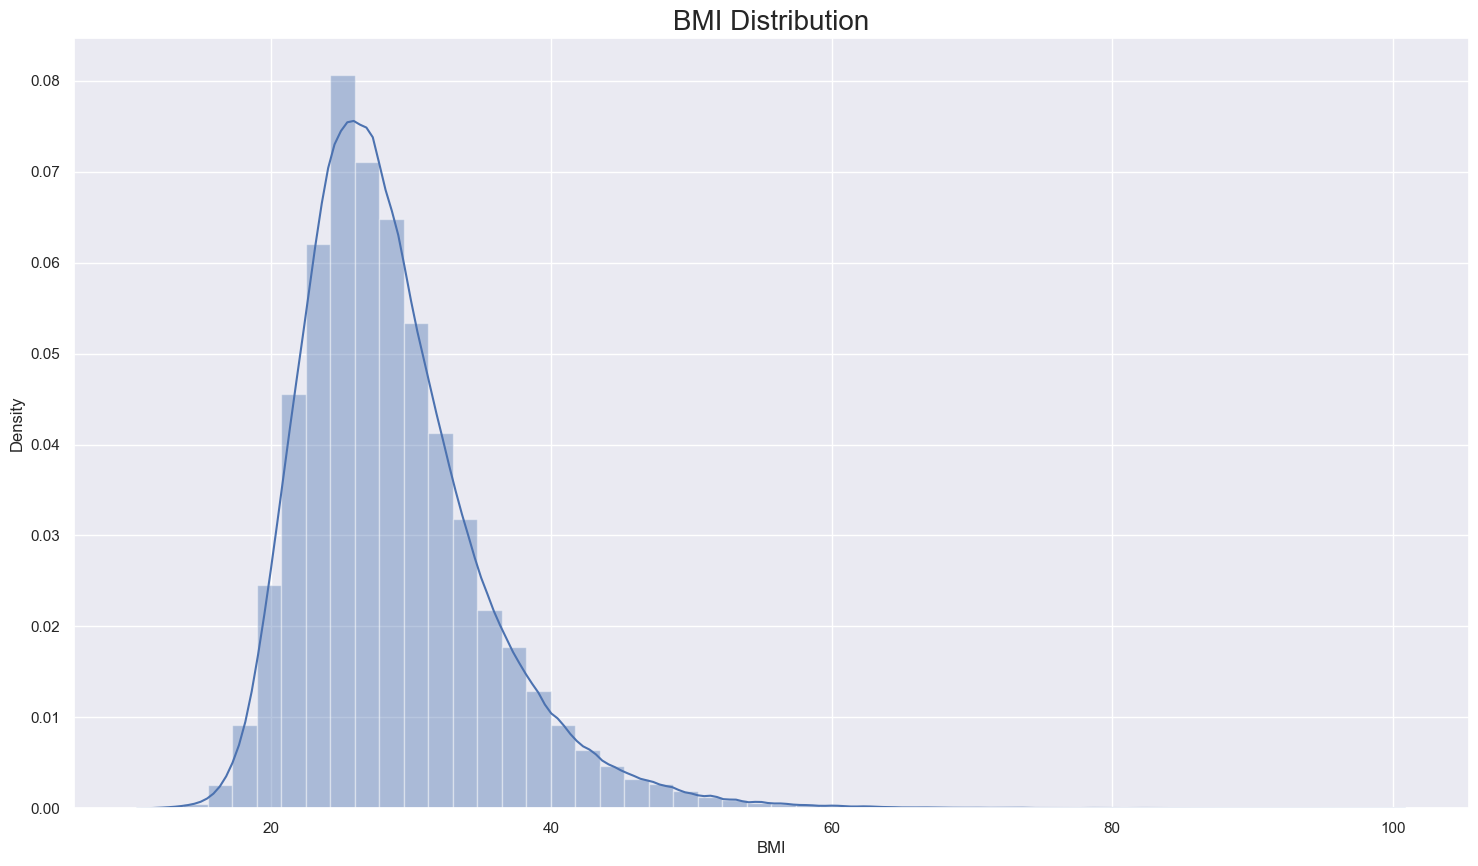

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\2054700241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(healthData[feature])


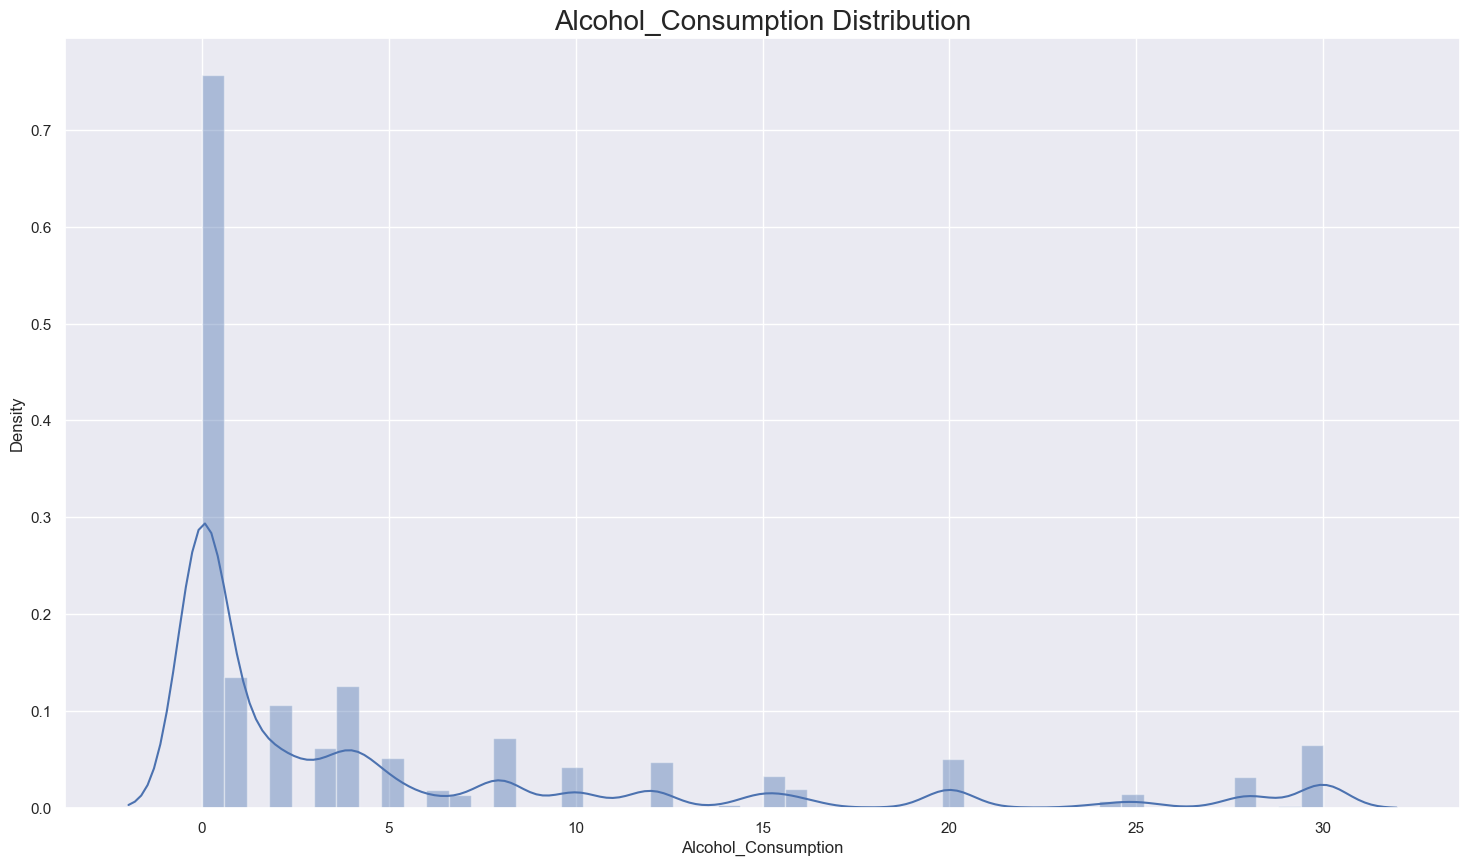

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\2054700241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(healthData[feature])


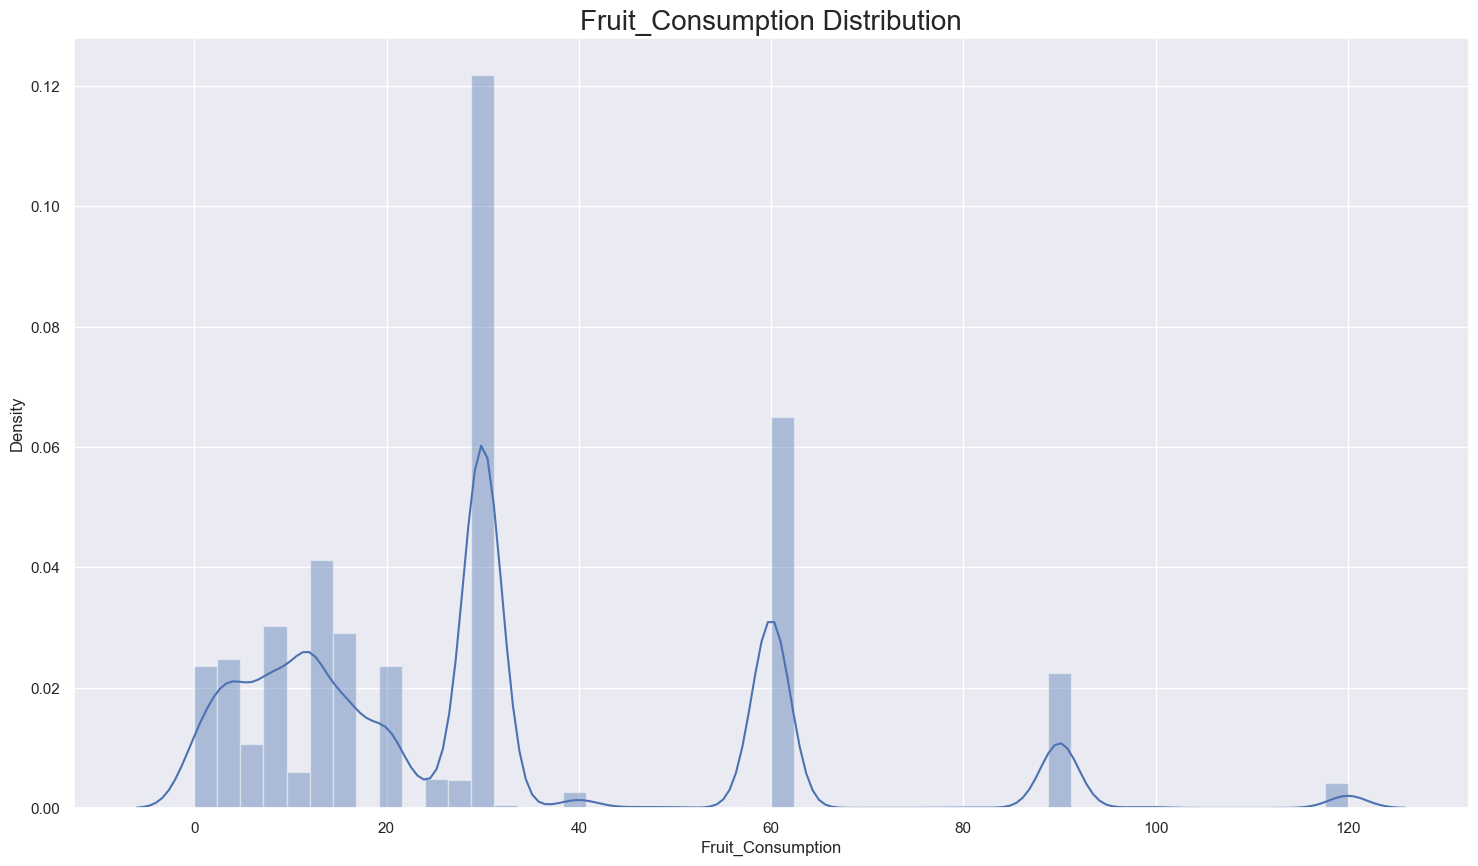

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\2054700241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(healthData[feature])


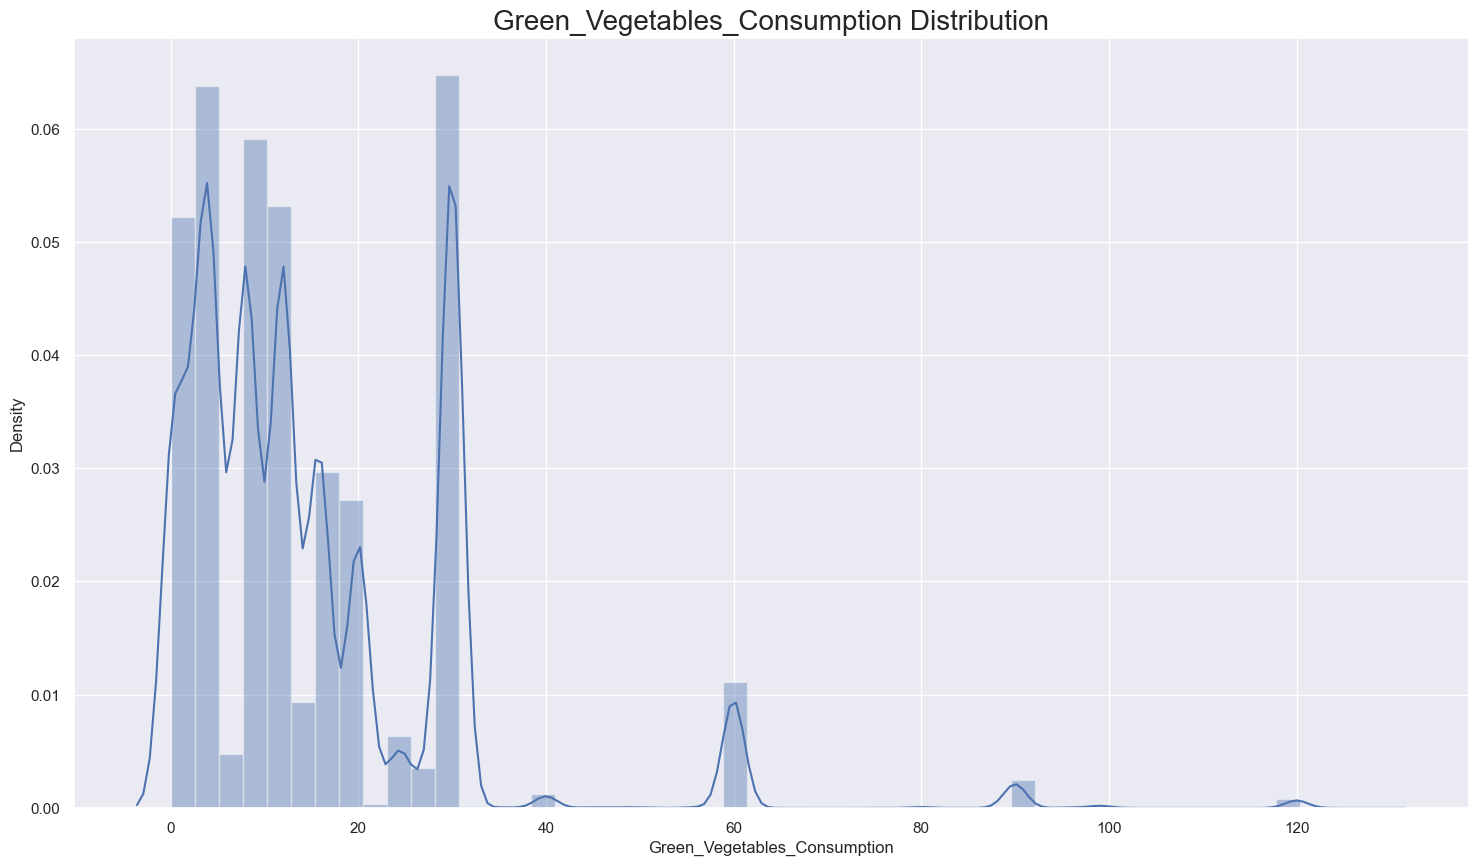

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\2054700241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(healthData[feature])


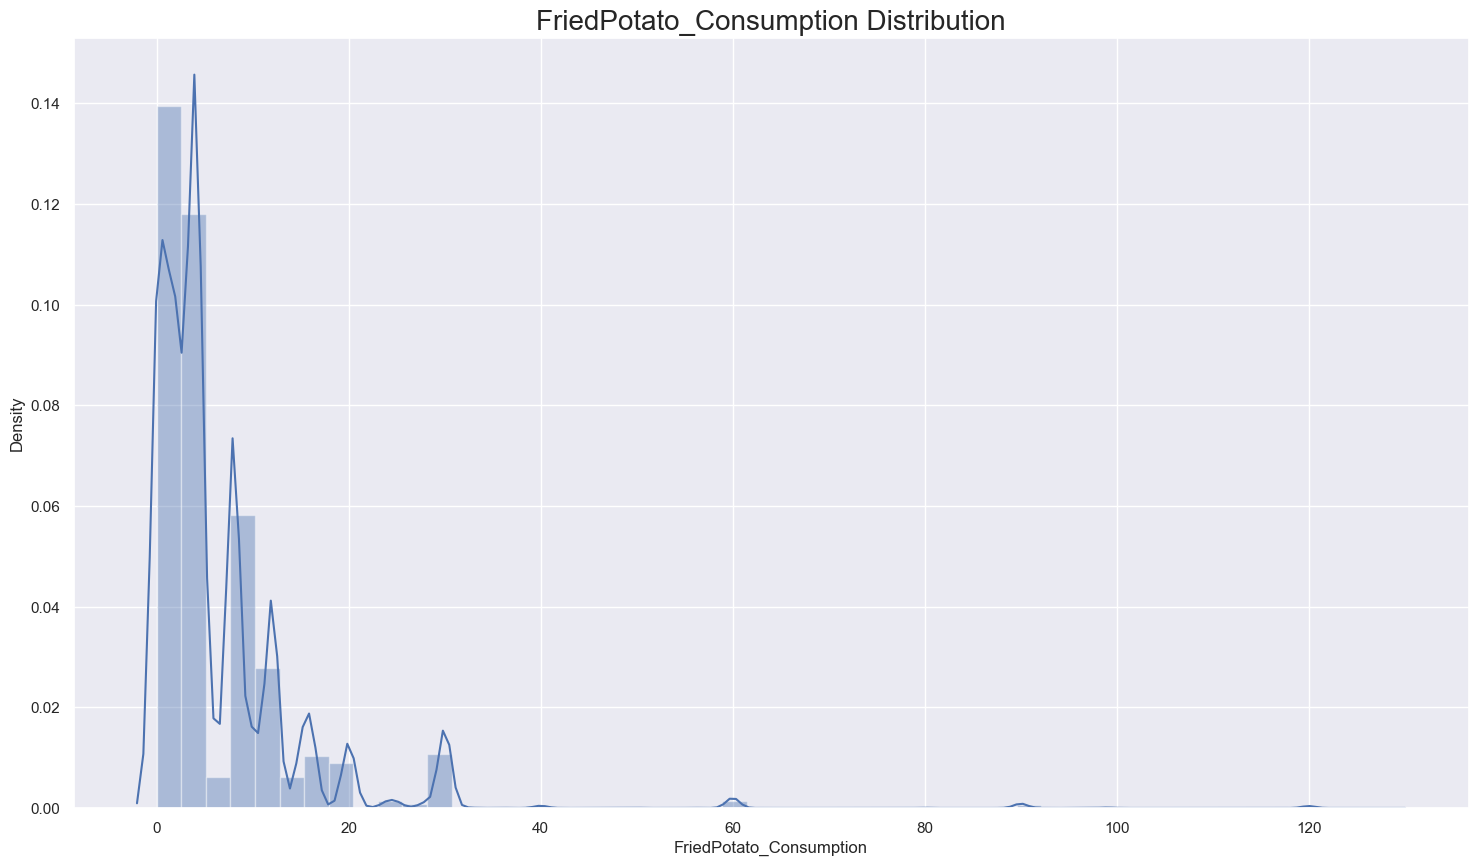

In [34]:
numeric_features = ['BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(healthData[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()


From the above distplots, we can see that BMI follows a normal distribution that is slanted to the left. Whereas for the other consumption distributions, there are quite a few outliers that have a much higher than average consumption. We can tell that majority of people do not drink any alcohol, majority of people consume about 30 for fruits, while for vegetables there are a majority of people that eat less than 20 green vegetables but there is a spike when consumption of green vegetables is around 30, and majority of people eat less than around 10 fried potato. 

Text(0.5, 1.0, 'General_Health')

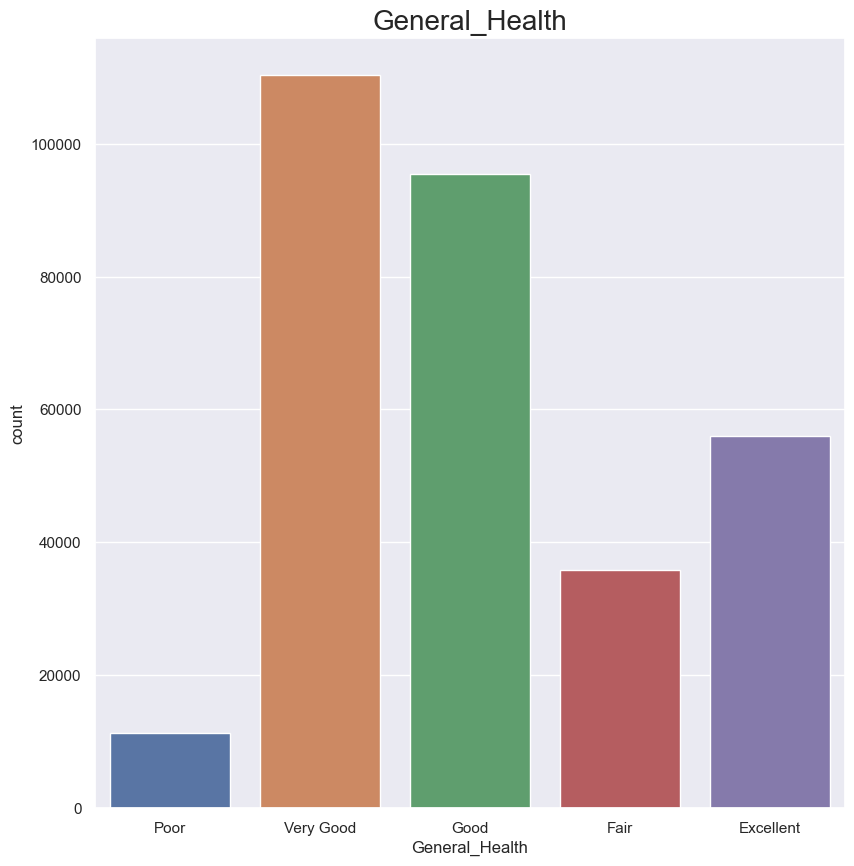

In [35]:
#Distribution of outcome variable, General_Health
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="General_Health", data=healthData)
plt.title("General_Health", size=20)


Text(0.5, 1.0, 'Checkup')

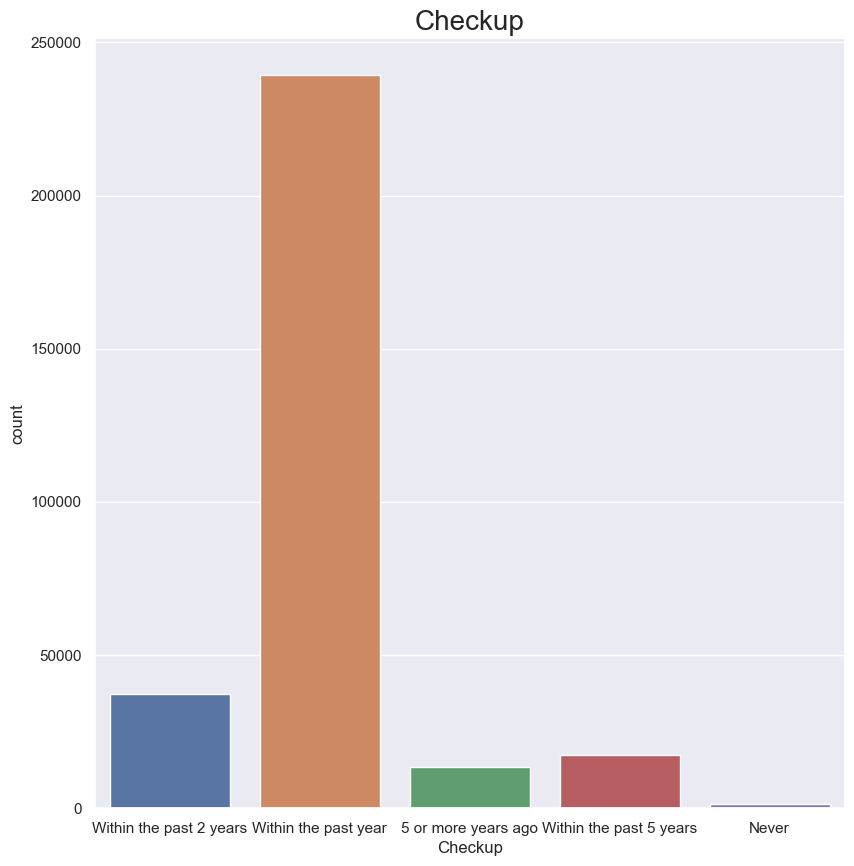

In [36]:
#Distribution of outcome variable, Checkup
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="Checkup", data=healthData)
plt.title("Checkup", size=20)

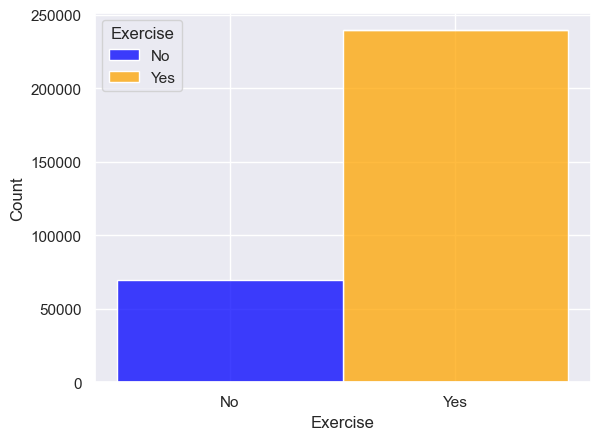

In [37]:
sns.histplot(data=healthData, x='Exercise', hue='Exercise', multiple='stack', palette=['blue', 'orange'])
plt.show()

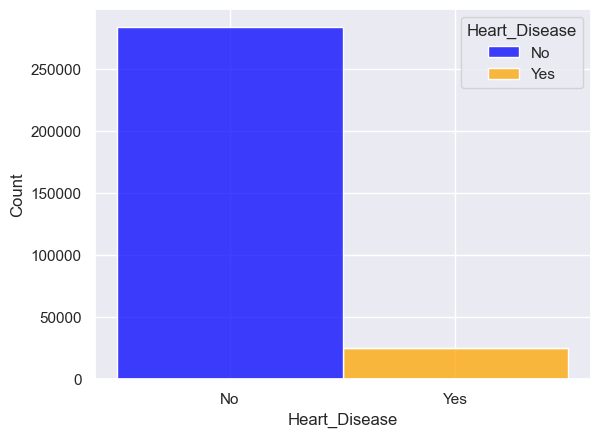

In [38]:
sns.histplot(data=healthData, x='Heart_Disease', hue='Heart_Disease', multiple='stack', palette=['blue', 'orange'])
plt.show()

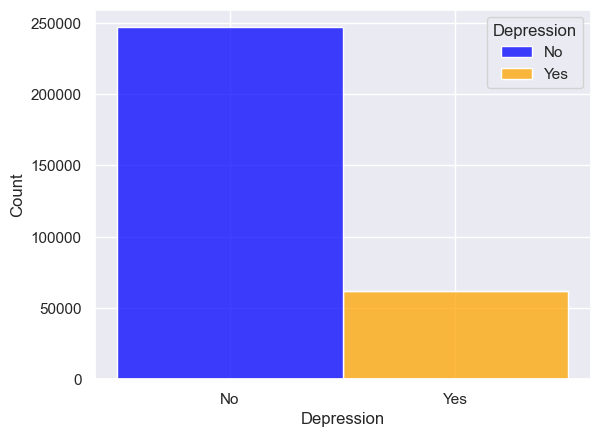

In [39]:
sns.histplot(data=healthData, x='Depression', hue='Depression', multiple='stack', palette=['blue', 'orange'])
plt.show()

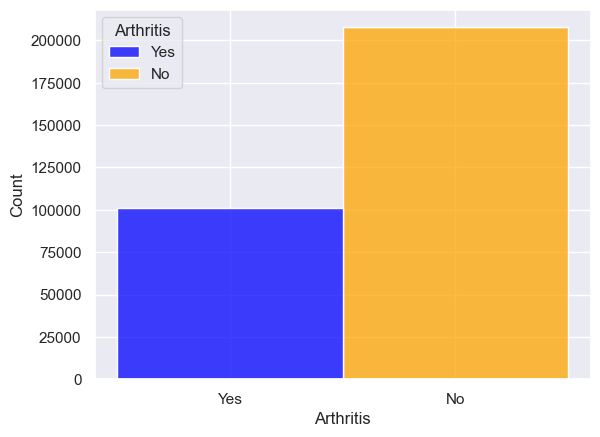

In [40]:
sns.histplot(data=healthData, x='Arthritis', hue='Arthritis', multiple='stack', palette=['blue', 'orange'])
plt.show()

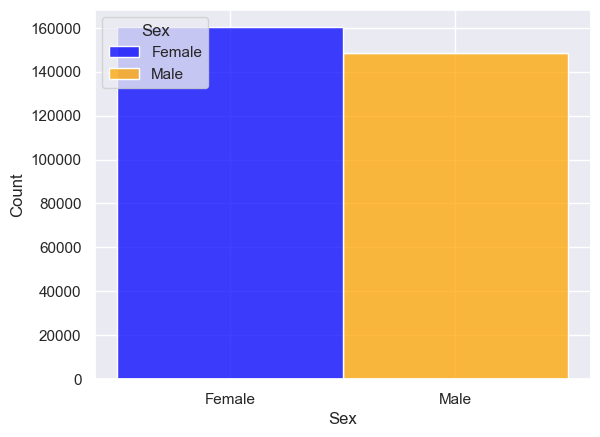

In [41]:
sns.histplot(data=healthData, x='Sex', hue='Sex', multiple='stack', palette=['blue', 'orange'])
plt.show()

C:\Users\Krystal\AppData\Local\Temp\ipykernel_35568\1430115360.py:3: UserWarning: 
The palette list has fewer values (2) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=h_sorted, x='Age', hue='Age', multiple='stack', palette=['blue', 'orange'])


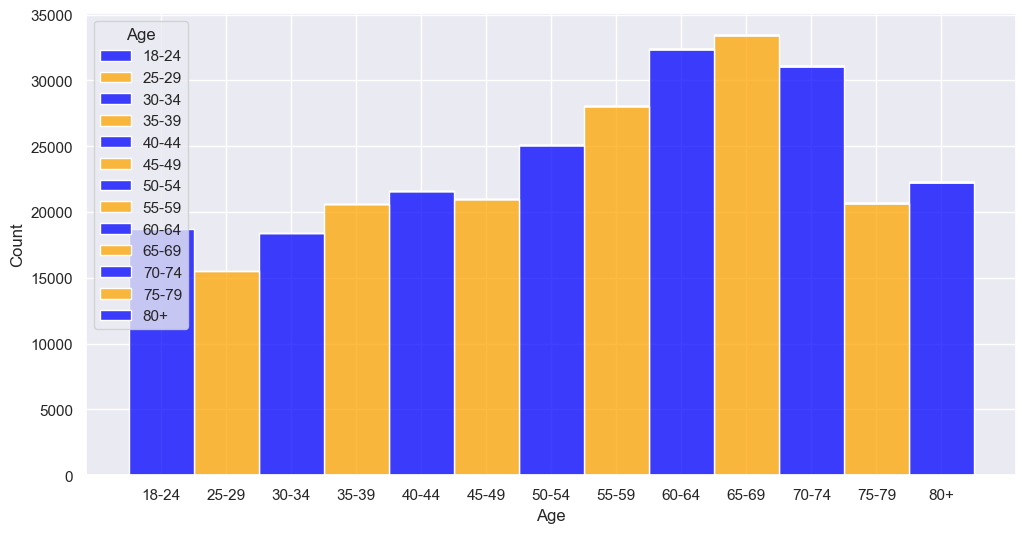

In [42]:
h_sorted = healthData.sort_values(by='Age')
plt.figure(figsize=(12, 6))
sns.histplot(data=h_sorted, x='Age', hue='Age', multiple='stack', palette=['blue', 'orange'])
plt.show()

---

## Bivariate Analysis

In [56]:
healthData.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [57]:
healthData.Age.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [58]:
healthData.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [43]:
ageCat = {'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80+': 13}
binaryCat = {'No' : 0, 'Yes' : 1}
healthCat = { 'Poor' : 1, 'Very Good': 4, 'Good': 3, 'Fair': 2, 'Excellent': 5}

In [55]:
myField1 = healthData['Heart_Disease']
myField2 = healthData['Diabetes']
contTable = pd.crosstab(myField2,myField1)
contTable

Heart_Disease,No,Yes
Diabetes,,
No,243436,15705
"No, pre-diabetes or borderline diabetes",6102,794
Yes,31795,8376
"Yes, but female told only during pregnancy",2550,96


We will exclude Diabetes from our correlation analysis as we are unable to rank these categories within the Diabetes variable and it is also not a binary categorical variable, hence it is not as suited to be used for correlation analysis.

In [52]:
analyseData = healthData.drop(columns=['Sex', 'Checkup','Diabetes'])

In [53]:
for i in analyseData.columns:
    analyseData[i] = analyseData[i].replace(binaryCat)
    analyseData[i] = analyseData[i].replace(ageCat)
    analyseData[i] = analyseData[i].replace(healthCat)
    
analyseData.head()

,General_Health,Exercise,Heart_Disease,Depression,Arthritis,Age,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,0,0,0,1,11,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,0,1,0,0,11,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,1,0,0,0,9,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,0,0,12,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,0,0,0,0,13,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


C:\Users\Krystal\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


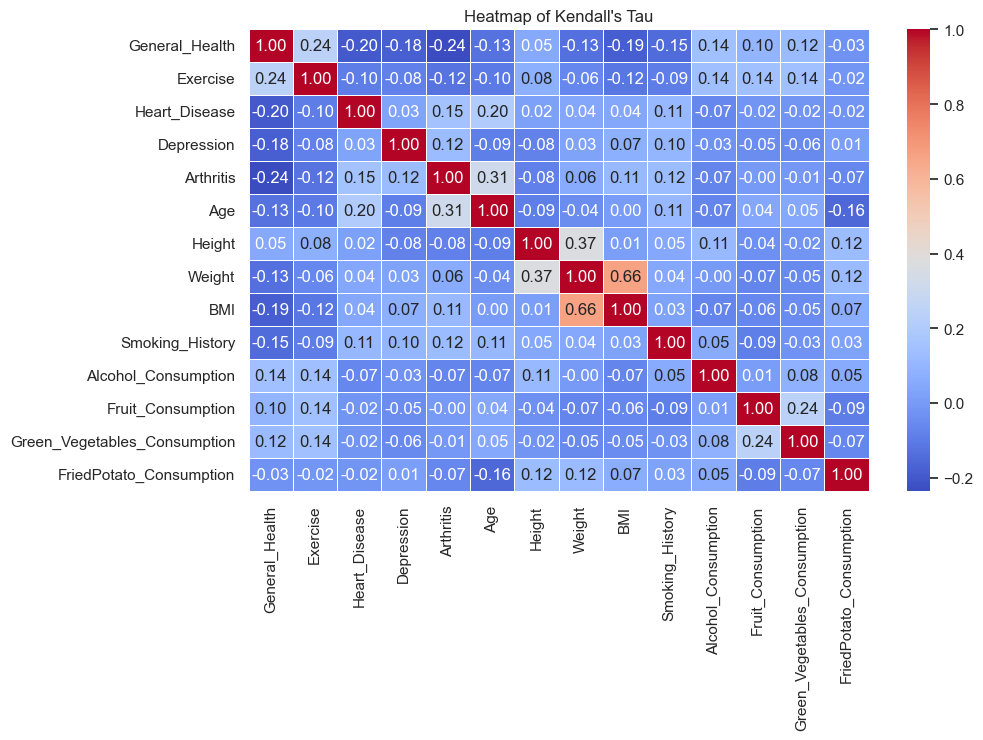

In [54]:
from scipy.stats import kendalltau 

correlation_matrix = pd.DataFrame(index=analyseData.columns, columns=analyseData.columns)

for i in analyseData.columns:
    for j in analyseData.columns:
        corr, _ = kendalltau(analyseData[i], analyseData[j]) 
        correlation_matrix.loc[i, j] = corr
        
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Kendall's Tau")
plt.show()  

From correlation table, we can see that General_Health has a small negative correlation to Heart_Disease. However, based on theory there should be a positive correlation instead where the healthier you are, the less likely there is for you to have heart disease. Hence this might be due to data imbalance, where more data needs to be collected to ensure correlation is more accurate.

From correlation table, we can also see that there is a small positive correlation between Arthritis and Heart_Disease, between Smoking_History and Heart_Disease, and between Age and Heart_Disease. 
This aligns well with what we know in theory as 
- For Arthritis and Heart_Disease: Arthritis and heart disease shares similar risk factors that contribute to the development of both conditions and can exacerbate symptoms, thus having a positive correlation
- For Smoking_History and Heart_Disease: Smoking can lead to damage of blood vessels, causing formation of blood clots, which increases heart rate and blood pressure, causing decreased oxygen delivery and thus higher risk of one having a heart attack, or heart disease, hence having a positive correlation
- For Age and Heart_Disease: The heart may become less efficient at pumping blood where heart muscle may thicken or stiffen as one ages, leading to increase risk of heart rhythm disorders and heart failure, thus increasing risk of heart disease, and hence having a positive correlation

In [21]:
categorical_data = healthData[['Heart_Disease','General_Health', 'Exercise', 'Depression', 'Age', 'Sex', 'Smoking_History','Diabetes', 'Arthritis']]
categorical_data.head()

,Heart_Disease,General_Health,Exercise,Depression,Age,Sex,Smoking_History,Diabetes,Arthritis
0,No,Poor,No,No,70-74,Female,Yes,No,Yes
1,Yes,Very Good,No,No,70-74,Female,No,Yes,No
2,No,Very Good,Yes,No,60-64,Female,No,Yes,No
3,Yes,Poor,Yes,No,75-79,Male,No,Yes,No
4,No,Good,No,No,80+,Male,Yes,No,No


<Figure size 800x600 with 0 Axes>

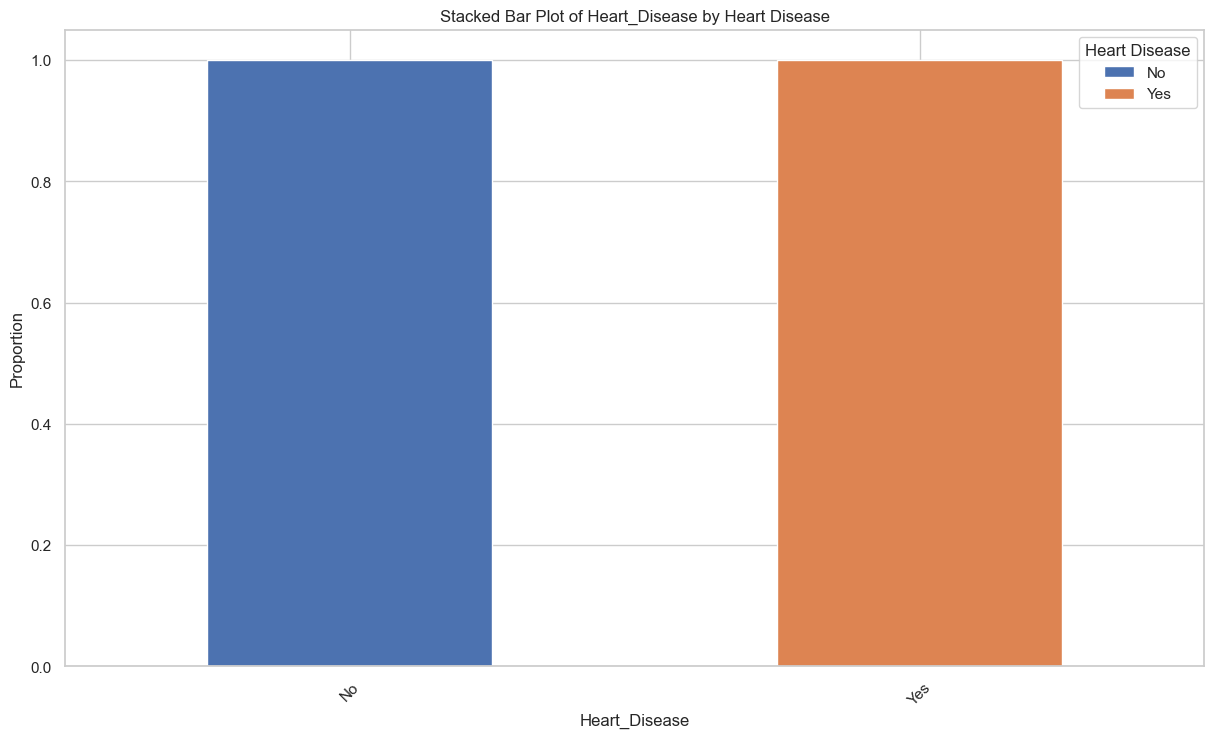

<Figure size 800x600 with 0 Axes>

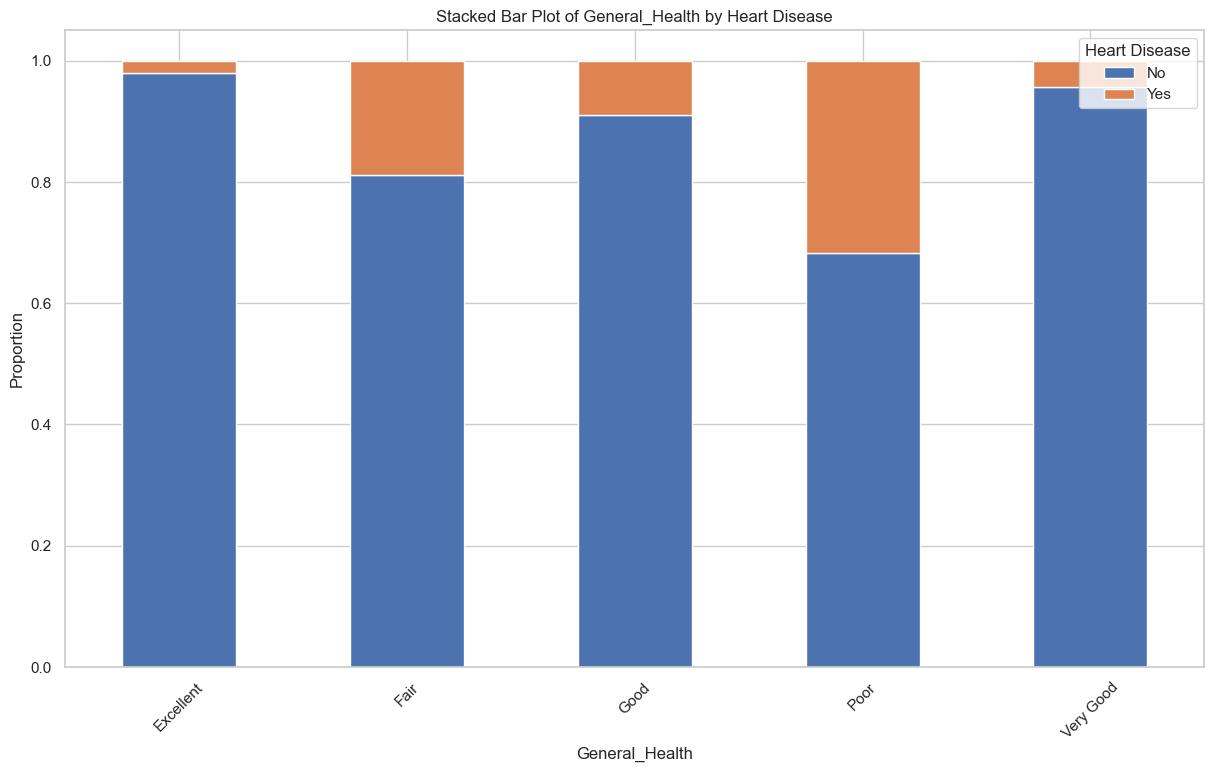

<Figure size 800x600 with 0 Axes>

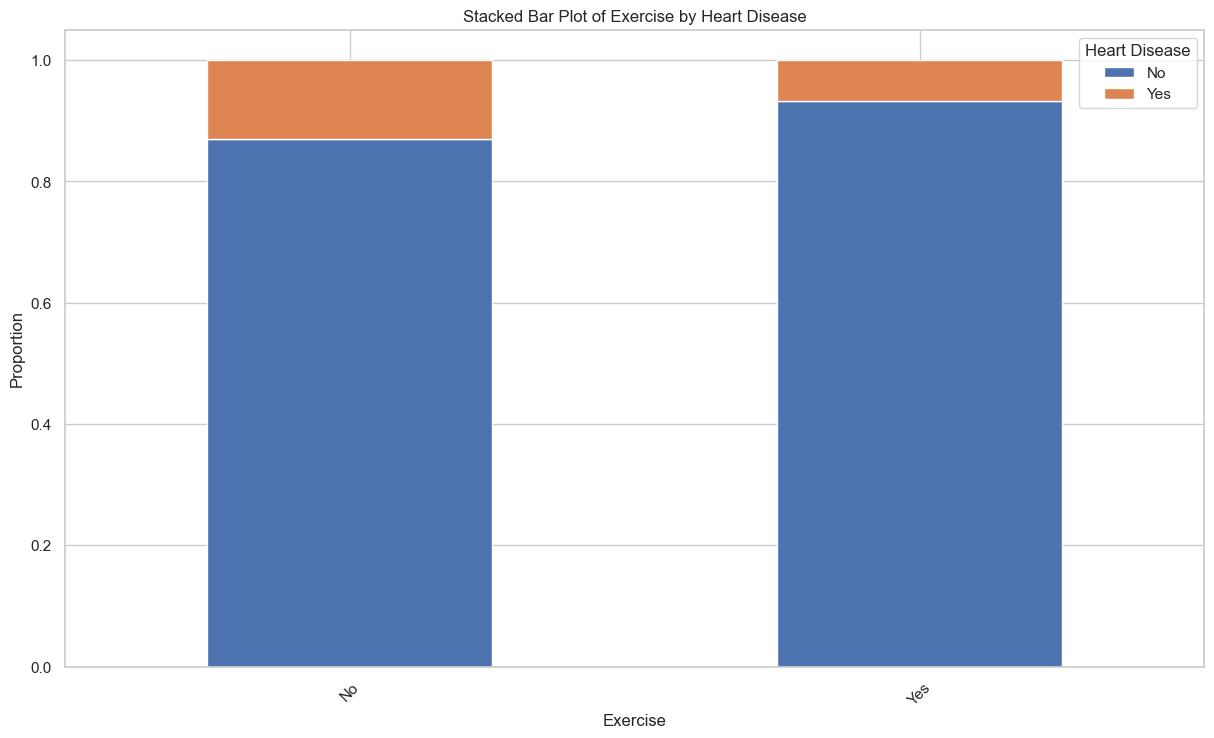

<Figure size 800x600 with 0 Axes>

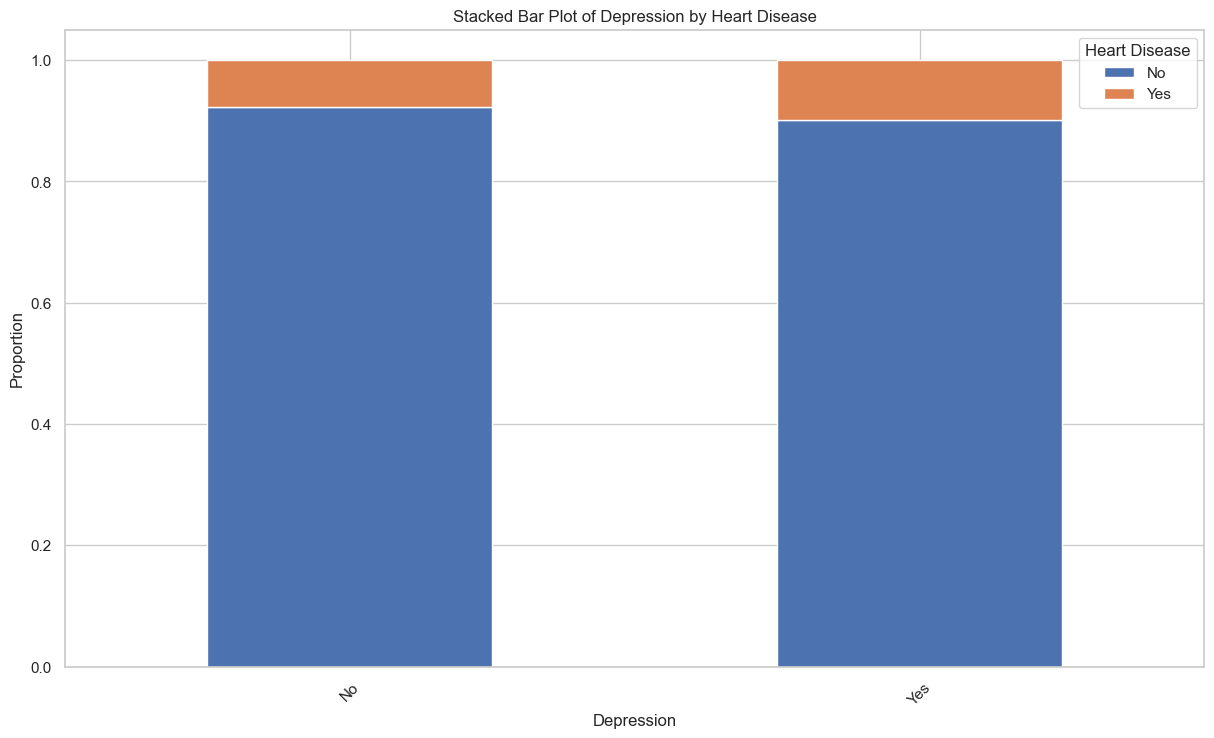

<Figure size 800x600 with 0 Axes>

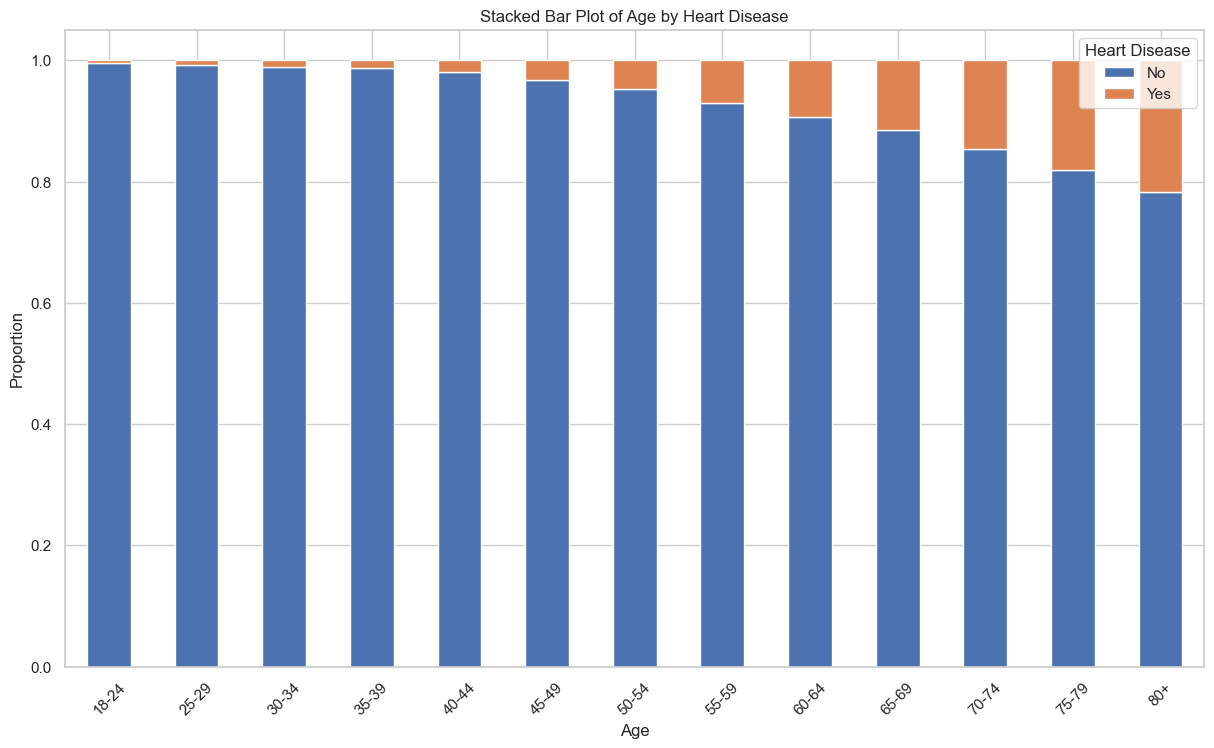

<Figure size 800x600 with 0 Axes>

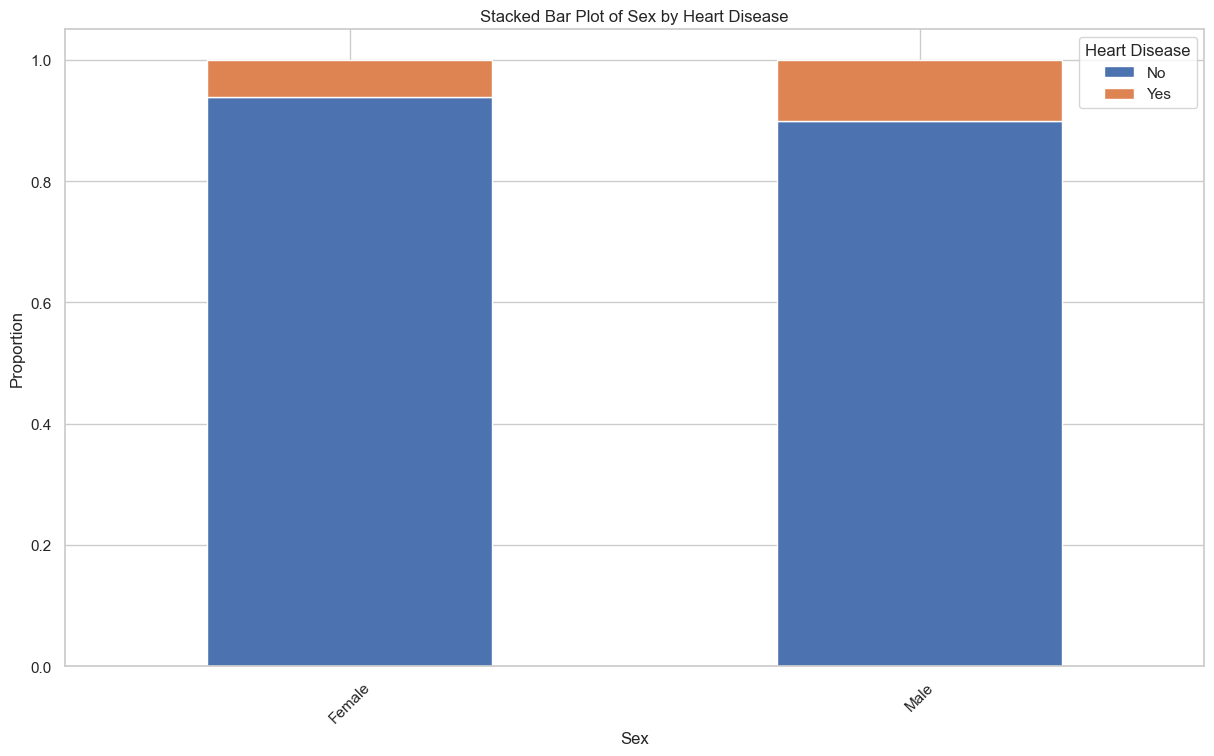

<Figure size 800x600 with 0 Axes>

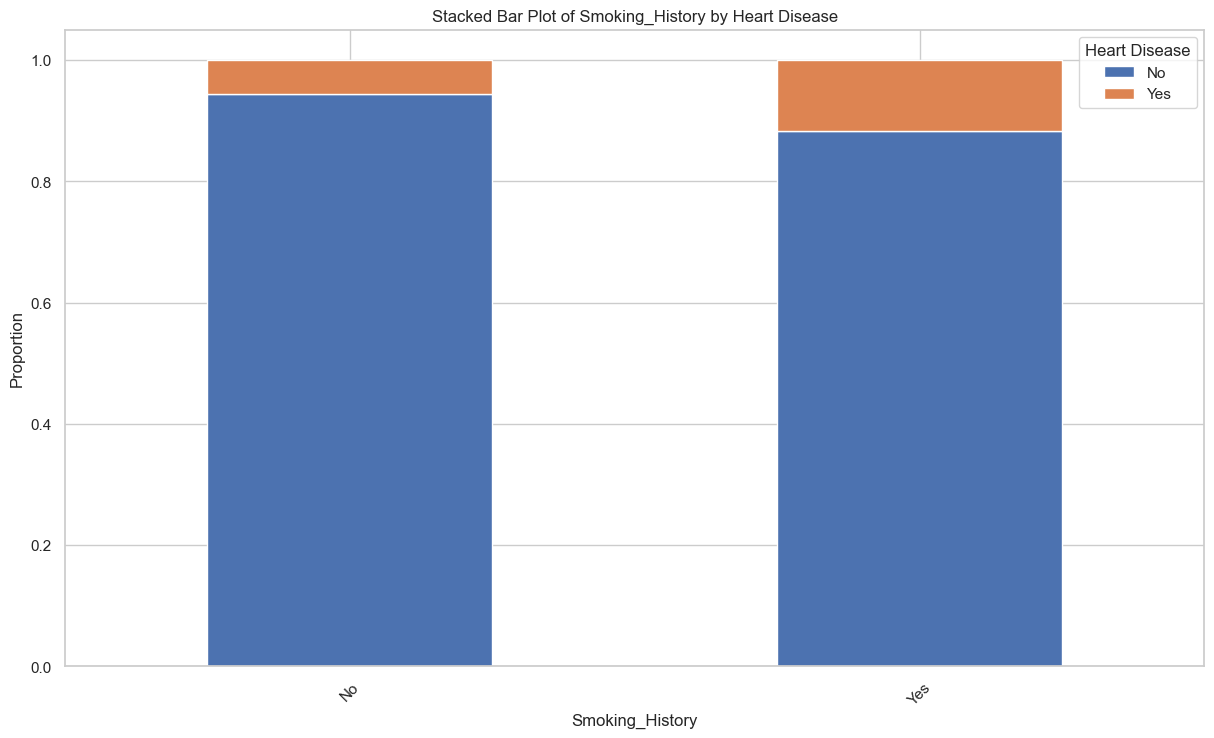

<Figure size 800x600 with 0 Axes>

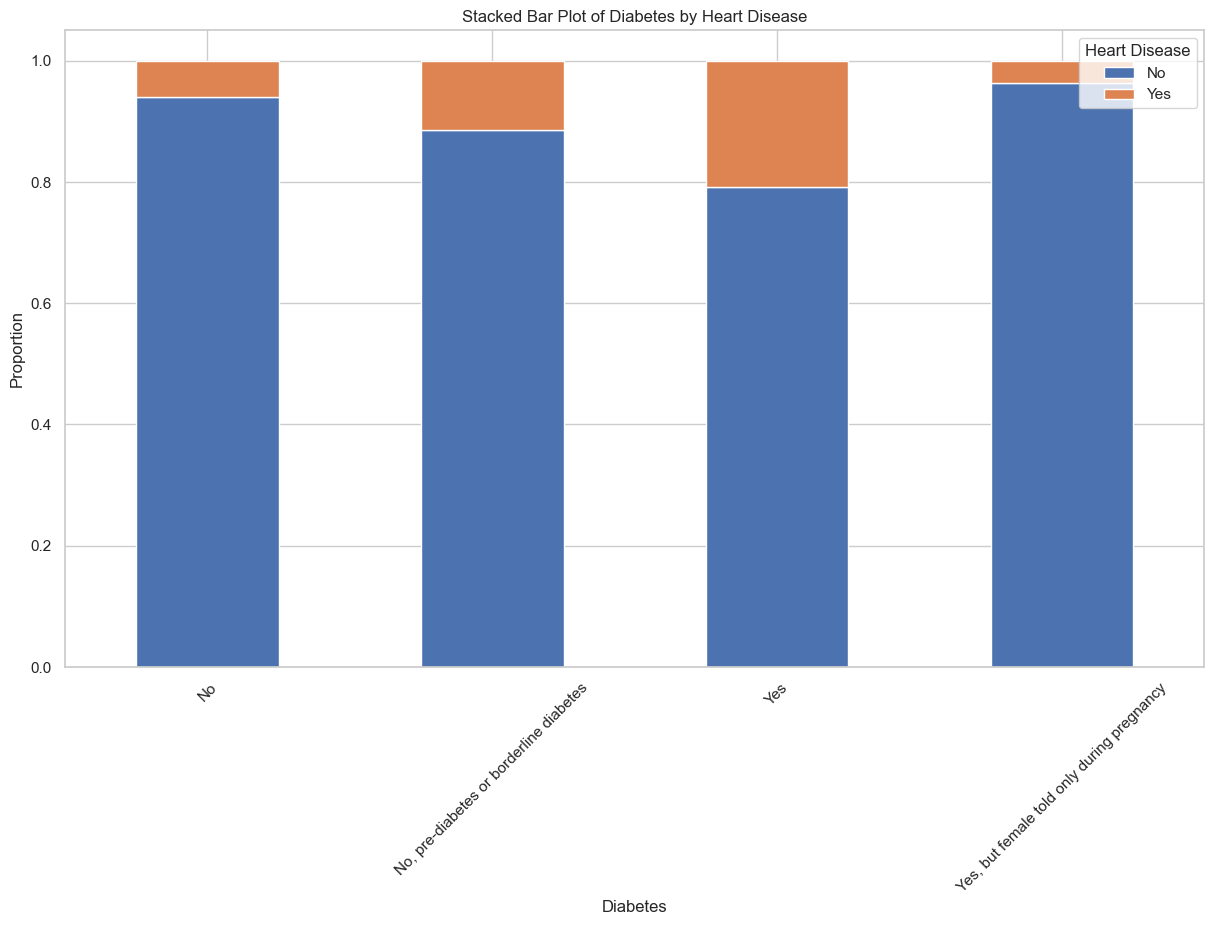

<Figure size 800x600 with 0 Axes>

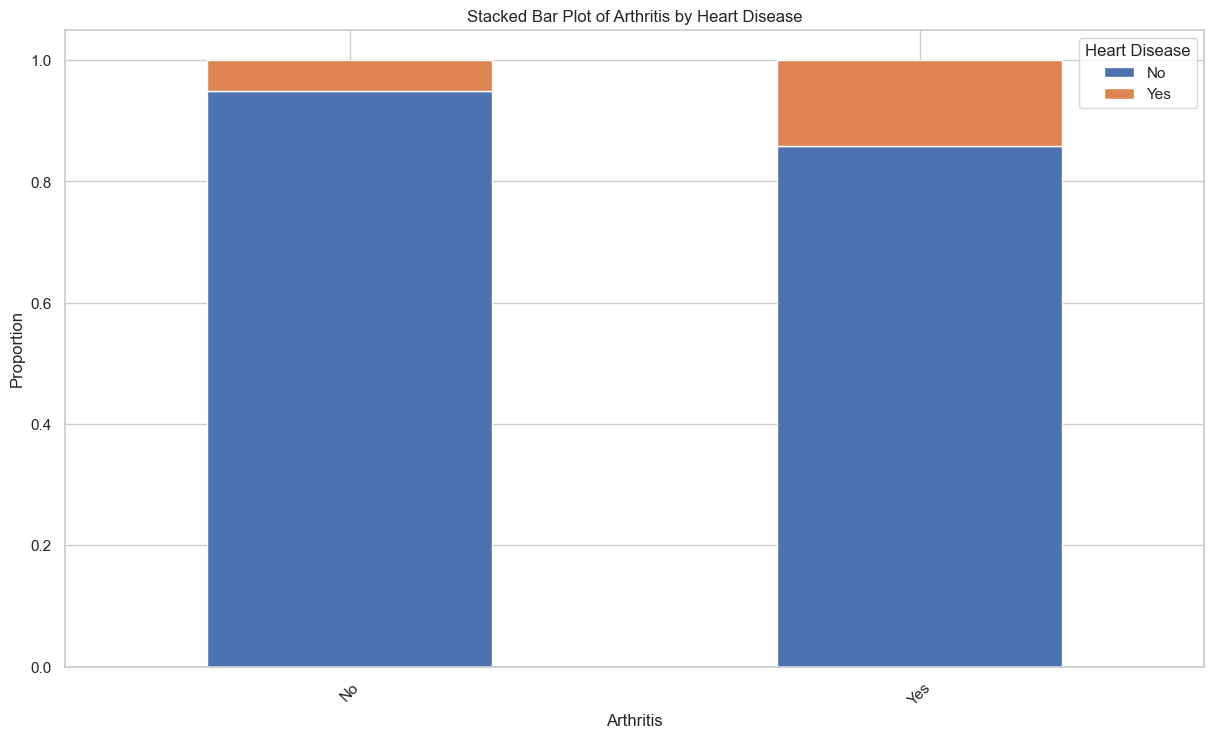

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each categorical variable
for column in categorical_data.columns:
    # Create a cross-tabulation table between the current categorical variable and 'Heart_Disease'
    crosstab = pd.crosstab(categorical_data[column], healthData['Heart_Disease'], normalize='index')
    
    # Plot the stacked bar plot
    plt.figure(figsize=(8, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {column} by Heart Disease')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='Heart Disease', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


Using Stacked bar plots, it helped us better visualise and compare the proportions of "yes" and "no" classes for people with and without Heart_Disease within each category or subgroup. Each bar in the plot represents a category, and the height of the bar is divided into segments corresponding to the proportions of "yes" and "no" responses. This makes it easier for us to visually assess the distribution of responses and identify patterns or differences between groups. This can be especially seen where for the Stacked Bar Plot of Age by Heart Disease, we can clearly tell that there is an increasing proportion of people with Heart_Disease as the age category increases. We can also see that there is not much change in proportion of people with heart disease or not when comparing against whether those people have Depression or not. 

In [37]:
numerical_data = healthData[['Height', 'Weight', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]
numerical_data.head()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0


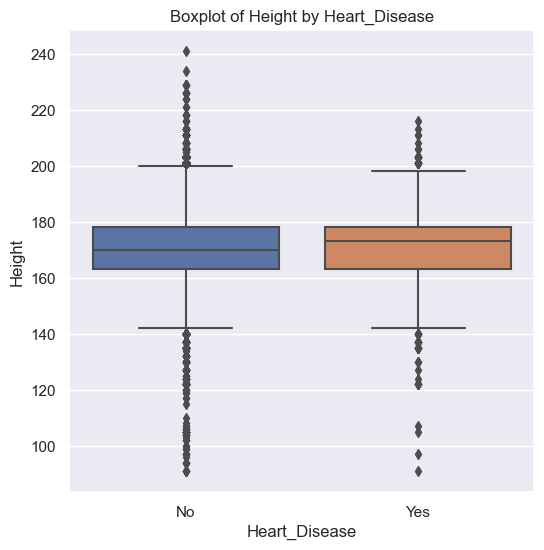

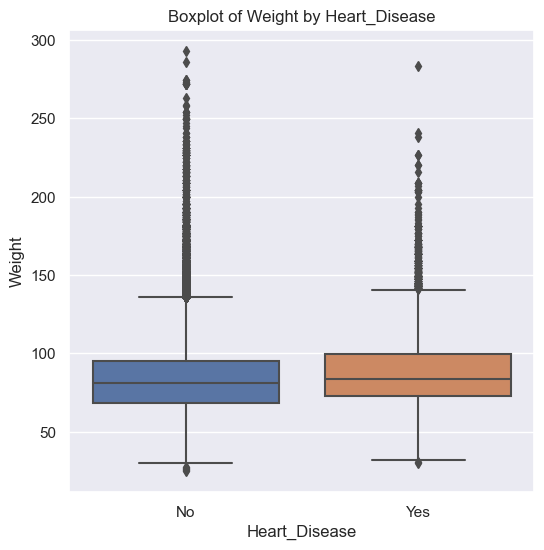

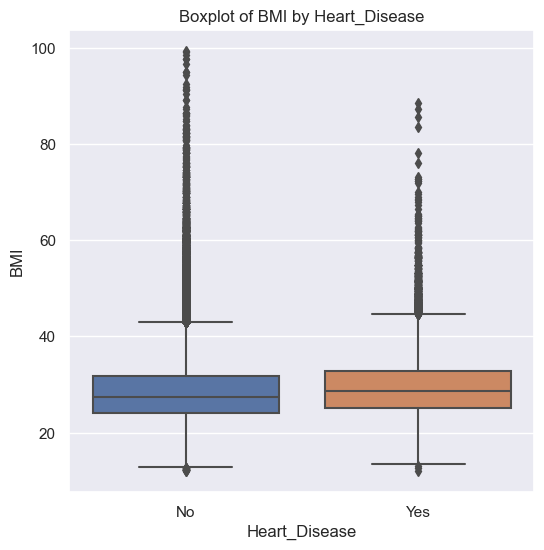

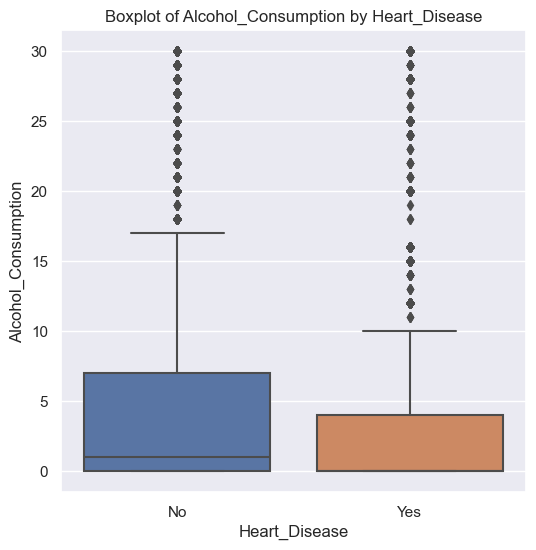

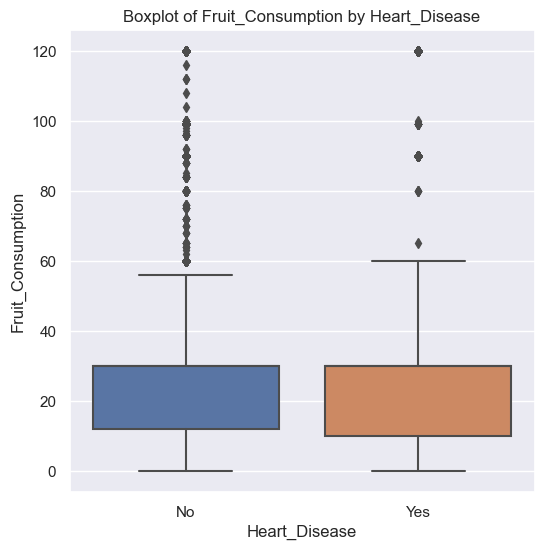

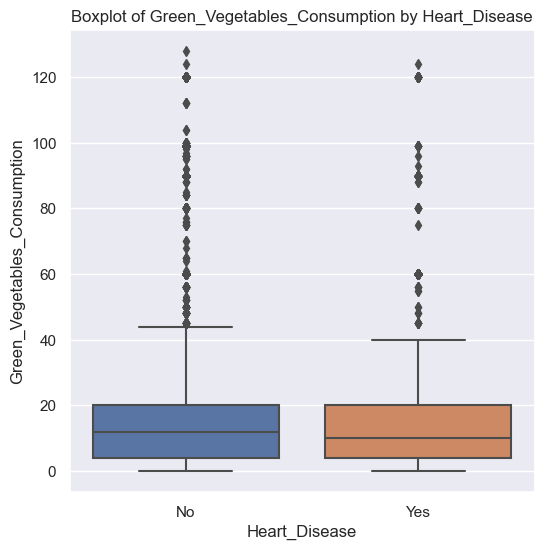

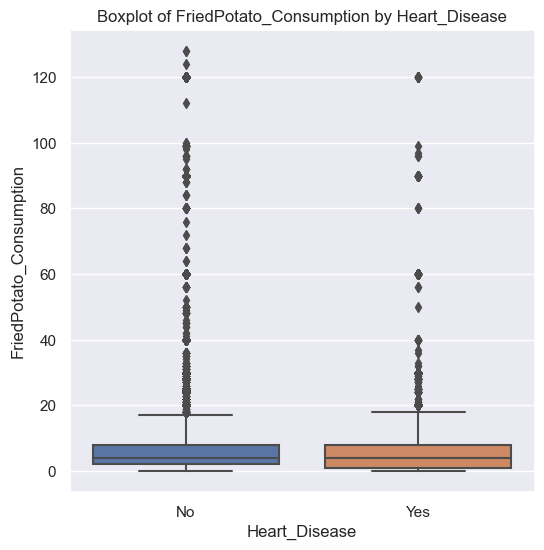

In [38]:
for variable in numerical_data:
    plt.figure(figsize=(6, 6))
    sb.boxplot(x=healthData['Heart_Disease'], y=variable, data=healthData)
    plt.title(f'Boxplot of {variable} by Heart_Disease')
    plt.show()

From these blox-plots comparsion, some interesting information we got is that people with no heart disease have a mean of BMI between 20 to 30 while people with heart disease have a mean of BMI slightly above 30 to 40. We also can see that people with heart disease consume fewer green vegetables than people without heart disease since the mean is lower. It can also be seen that in most of the comparisons, the Interquartile Range for 'Yes' and 'No' class of Heart_Disease is usually similar, however for boxplot of Alcohol_Consumption by Heart_Disease, there is a much wider Interquartile Range for the 'No' class than the 'Yes' class. 

